In [1]:
import pandas as pd
import os

In [2]:
#Change Directory to Dataset File
os.chdir('C:/Users/saram/Documents/MS Data Analytics Engineering/CS 504 - Data Management and Mining/Project Folder')

In [3]:
#Read Income Data
income_data = pd.read_csv('Datasets/Income/CLEANED Income data.csv')

#Inspect Data
income_data.head(10)

,Geographic Area Name,Estimate!!Households!!Total,Estimate!!Households!!Median income (dollars)
0,"Albany County, New York",125376,62293
1,"Chautauqua County, New York",52983,44304
2,"Kings County, New York",944650,52782
3,"New York County, New York",758345,79781
4,"Tioga County, New York",19996,57153
5,"Allegany County, New York",18124,45359
6,"Greene County, New York",17106,53214
7,"Hamilton County, New York",1095,55587
8,"Washington County, New York",23988,52527
9,"Broome County, New York",78821,49064


In [4]:
# Clean County formatting to match Hospital Facility Data
income_data["Geographic Area Name"] = income_data["Geographic Area Name"].str.split(' County', n = 1, expand = True)

# Inspect Data
income_data.head(10)

,Geographic Area Name,Estimate!!Households!!Total,Estimate!!Households!!Median income (dollars)
0,Albany,125376,62293
1,Chautauqua,52983,44304
2,Kings,944650,52782
3,New York,758345,79781
4,Tioga,19996,57153
5,Allegany,18124,45359
6,Greene,17106,53214
7,Hamilton,1095,55587
8,Washington,23988,52527
9,Broome,78821,49064


In [5]:
# Read Census Data CSV
demo_data = pd.read_csv('Datasets/Demographics/CLEANED - Census data.csv')

# Clean County formatting to match Hospital Facility Data
demo_data["NAME"] = demo_data["NAME"].str.split(' County', n = 1, expand = True)

# Inspect DemoData
demo_data.head(10)

,NAME,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Median age (years),Percent Estimate!!RACE!!Total population!!One race!!White,Percent Estimate!!RACE!!Total population!!One race!!Black or African American,Percent Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native,Percent Estimate!!RACE!!Total population!!One race!!Asian,Percent Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander!!Other Pacific Islander,Percent Estimate!!RACE!!Total population!!Two or more races,Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)
0,Dutchess,295685,41.8,78.6,10.5,0.4,3.7,0.0,3.0,11.7
1,Jefferson,116567,31.9,86.1,5.8,0.6,1.5,0.2,4.1,7.3
2,Schoharie,31611,44.1,96.0,1.6,0.2,0.9,0.0,1.1,3.0
3,Monroe,748680,38.6,75.9,15.3,0.4,3.7,0.0,2.9,8.3
4,Fulton,53955,43.4,94.7,1.8,0.3,0.7,0.0,1.5,2.8
5,Otsego,60750,42.0,93.5,2.0,0.2,1.4,0.0,1.9,3.5
6,New York,1653877,37.1,56.4,14.9,0.4,12.0,0.0,4.4,26.1
7,Tioga,49322,44.0,96.7,0.6,0.0,0.8,0.0,1.6,1.8
8,Cayuga,78319,42.5,92.0,4.1,0.3,0.5,0.0,2.5,2.8
9,Orleans,41584,42.8,89.2,6.0,0.4,0.7,0.1,2.0,4.7


In [7]:
#Join Census Data
combo_data = demo_data.join(income_data.set_index('Geographic Area Name'), on='NAME')

# Remove Duplicate Rows (New York City and New York County both in dataset)
combo_data = combo_data.drop_duplicates(subset='NAME', keep='first')

# Inspect Data
combo_data.head(10)

combo_data.to_csv('CLEANED - Census Data 2')

In [8]:
# Read Health Data
health_data = pd.read_csv('Datasets/Hospital_Inpatient_Cost_Transparency__Beginning_2009_JOINED.csv')
health_data.head(10)

# Create dataframe for DRG Code of Interest
heart_df=health_data[(health_data['APR DRG Description']=='Heart Failure') & (health_data['Year'] == 2016) & (health_data['APR Severity of Illness Code'] == 1)]

# Build Weighted Average Dataframe for correlation testing
heart_df['charge x discharges'] = (heart_df['Mean Charge'])*(heart_df['Discharges'])

C:\Users\saram\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
heart_df_w = heart_df.groupby(['County'],  as_index = False)['charge x discharges', 'Discharges'].sum()

heart_df_w['weighted avg'] = (heart_df_w['charge x discharges']/heart_df_w['Discharges']).round(2)

heart_df_w.head(10)


,County,charge x discharges,Discharges,weighted avg
0,Albany,724909.44,38,19076.56
1,Allegany,30191.30,5,6038.26
2,Bronx,8529149.84,318,26821.23
3,Broome,173743.50,21,8273.50
4,Cattaraugus,53069.04,8,6633.63
5,Cayuga,95206.76,11,8655.16
6,Chautauqua,150414.93,25,6016.60
7,Chemung,295416.41,27,10941.35
8,Chenango,54783.65,5,10956.73
9,Clinton,131691.06,9,14632.34


In [10]:
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis

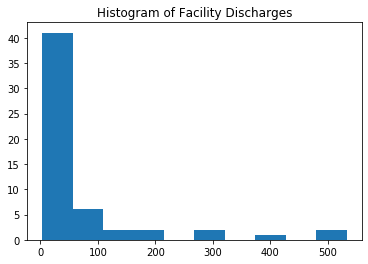

In [11]:
# Visualizing Skew of discharges
plt.hist(heart_df_w['Discharges'])
plt.title('Histogram of Facility Discharges')
plt.show()

In [16]:
# Inspecting data
heart_df_w['Discharges'].describe().round(2)

count     56.00
mean      65.12
std      121.79
min        3.00
25%        6.00
50%       16.00
75%       56.50
max      533.00
Name: Discharges, dtype: float64

In [18]:
# Test for skewness
skew(heart_df_w['Discharges'])

2.689239060794842

In [19]:
# Test for kurtosis
kurtosis(heart_df_w['Discharges'])

6.543503247574671

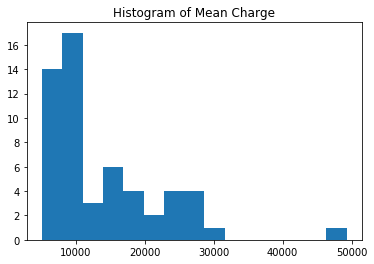

In [20]:
# Visualizing Mean Charge
plt.hist(heart_df_w['weighted avg'], bins = 15)
plt.title('Histogram of Mean Charge')
plt.show()

In [21]:
heart_df_w['weighted avg'].describe().round(2)

count       56.00
mean     13906.47
std       8462.64
min       5110.62
25%       8069.94
50%      10479.18
75%      17818.27
max      49273.05
Name: weighted avg, dtype: float64

In [23]:
skew(heart_df_w['weighted avg'])

1.6841559237757042

In [24]:
kurtosis(heart_df_w['weighted avg'])

3.7054965508083146